# Capstone: Musical Recommender

Kelly Slatery | US-DSI-10

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob, Word

# Import Data

In [2]:
df = pd.read_csv('./data/musical_data_vectors_labels.csv')
df.shape

(194, 6)

In [3]:
df.head()

,name,combined,clean_combined,vectors,km_labels,db_labels
0,Les Misérables,"Act I In 1815 France, prisoners work at hard l...",France prisoner work hard labour work song yea...,[-2.55308696e-03 1.25066981e-01 -3.78664001e-...,1,0
1,The Phantom of the Opera,"Prologue In 1911 Paris, the Paris Opéra hosts ...",prologue Paris Paris Opera host auction old th...,[ 4.53058779e-02 4.77313697e-02 -2.63329875e-...,3,0
2,Hamilton,The musical details Hamilton's life in two act...,musical detail Hamilton life act historical ch...,[-6.79643005e-02 1.21977791e-01 1.33586982e-...,2,0
3,West Side Story,"Act 1 Two rival teenage gangs, the Jets (White...",rival teenage gang jet White Americans Sharks ...,[-3.16287242e-02 6.83641210e-02 -4.60400395e-...,6,0
4,Wicked,"Act I In the Land of Oz, the Ozians are rejoic...",Land Oz Ozians rejoice demise Elphaba Wicked W...,[ 1.18018501e-02 5.79135790e-02 -1.84583035e-...,3,0


# Sentiment Analysis

In [4]:
# Using pretrained TextBlob sentiment tags, assign sentiment values to each musical
df['sentiment'] = [TextBlob(summ).sentiment.polarity for summ in df['clean_combined']]

In [5]:
# Look at sentiment stats
print(f'Mean Sentiment: {round(np.mean(df["sentiment"]), 5)}')
print(f'Standard Deviation: {round(np.std(df["sentiment"]), 5)}')

Mean Sentiment: 0.08823
Standard Deviation: 0.0661


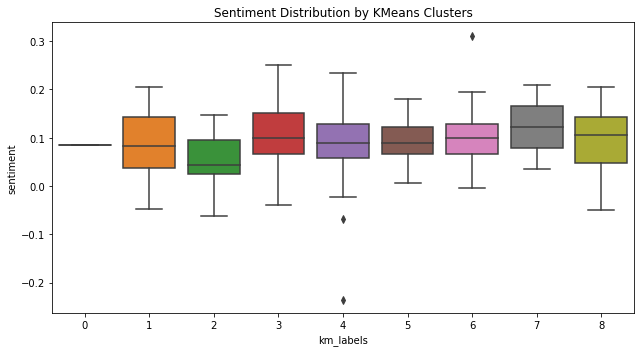

In [6]:
# Explore if there is a relationship between previous cluster labels and sentiment
plt.figure(figsize=(9,5))
sns.boxplot(df['km_labels'], df['sentiment'])
plt.title('Sentiment Distribution by KMeans Clusters')
plt.tight_layout();

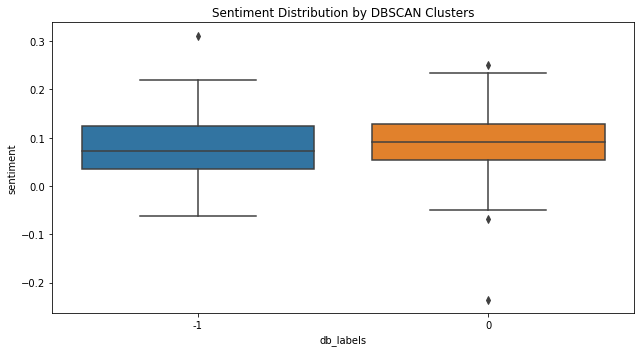

In [7]:
# Explore if there is a relationship between previous cluster labels and sentiment
plt.figure(figsize=(9,5))
sns.boxplot(df['db_labels'], df['sentiment'])
plt.title('Sentiment Distribution by DBSCAN Clusters')
plt.tight_layout();

There do not appear to be significant differences in sentiment amongst the labeled clusters. Further ANOVA testing could be done to confirm significance, but is not necessary given the exploratory purpose of these charts.

In [8]:
# Explore which musicals were labeled negatively versus more positively
df[df['sentiment'] < 0]

,name,combined,clean_combined,vectors,km_labels,db_labels,sentiment
12,Into the Woods,Act I The Narrator introduces four characters:...,narrator introduce character Cinderella wish a...,[-5.10688163e-02 2.25389507e-02 -9.74607468e-...,3,0,-0.038550
19,Newsies,Act IIn the early hours of the morning in 1899...,IIn early hour morning New York City newsboy J...,[-5.93464412e-02 1.26437172e-01 -8.99834111e-...,6,0,-0.004866
22,Jesus Christ Superstar,"Act I Judas Iscariot, one of the Twelve Apostl...",Judas Iscariot apostle worry follower Jesus ge...,[-8.83730799e-02 5.93912825e-02 -3.39003317e-...,2,-1,-0.062217
26,Matilda,Act I As a chorus of children boast about bein...,chorus child boast parent miracle ballroom dan...,[-3.63293886e-02 1.45894200e-01 -1.61153674e-...,4,0,-0.021829
58,Spamalot,Before the show A recording encourages members...,recording encourage member audience let cellph...,[-5.28797694e-03 3.12410239e-02 -4.63203527e-...,3,0,-0.004827
75,Hedwig and the Angry Inch,The concept of the stage production is that th...,concept stage production audience watch gender...,[ 5.28952219e-02 1.09310351e-01 -1.24564141e-...,8,0,-0.048819
79,Man of La Mancha,"In the late sixteenth century, failed author-s...",late sixteenth century fail author soldier act...,[-5.07893711e-02 -2.17544753e-02 -3.72803472e-...,1,0,-0.046849
92,Porgy and Bess,Set in the early 1900s in the fictional Catfis...,Set early fictional Catfish Row section Charle...,[ 4.90282215e-02 1.02644064e-01 -3.70953651e-...,1,-1,-0.008199
93,Finding Neverland,The story is a mixture of fairy tale about Pet...,story mixture fairy tale Peter Pan description...,[ 2.41579134e-02 7.46509656e-02 -1.03090249e-...,4,0,-0.068664
107,Jekyll and Hyde,The majority of the show's story has not chang...,majority story change production production so...,[-2.03684084e-02 9.26513374e-02 -5.58920056e-...,2,0,-0.032340


In [9]:
# Explore which musicals were labeled negatively versus more positively
df[df['sentiment'] > .2]

,name,combined,clean_combined,vectors,km_labels,db_labels,sentiment
5,Chicago,Act I Velma Kelly is a vaudevillian who welcom...,Velma Kelly vaudevillian welcome audience toni...,[-1.18833175e-02 1.26261070e-01 -4.46663275e-...,1,0,0.204118
30,Beauty and the Beast,"Act I On a cold winter's night, an old beggar ...",cold winter night old beggar woman come young ...,[-6.49809688e-02 8.24065581e-02 -4.87560406e-...,3,0,0.251598
33,Joseph and the Amazing Technicolor Dreamcoat,The plot of the film follows the same story of...,plot film follow story Joseph life West End mu...,[-8.46077204e-02 3.95983048e-02 -7.06050098e-...,4,0,0.234679
44,Gypsy: A Musical Fable,"Act I Rose and her two daughters, Baby June an...",rise daughter Baby June Louise play vaudeville...,[-2.83920020e-03 1.47983938e-01 -5.01852259e-...,8,0,0.201193
54,Cinderella,"Act I In the village square, the Town Crier pr...",village square Town Crier proclaim Prince give...,[ 1.38638109e-01 1.31399725e-02 -6.75703287e-...,3,-1,0.219729
108,Beautiful: the Carole King Musical,From the Beautiful: The Carole King Musical ca...,beautiful Carole King Musical cast recording b...,[ 2.36983541e-02 2.04657570e-01 -8.88028219e-...,8,0,0.204355
164,Fosse,"This musical is a revue, compiled in its three...",musical revue compile act dance number associa...,[ 4.99542765e-02 5.13058715e-02 8.69140998e-...,7,-1,0.209821
187,The Magic Show,"The setting for the show is a seedy nightclub,...",setting seedy nightclub Hat age alcoholic magi...,[ 7.98589140e-02 9.68418792e-02 -1.14423044e-...,6,-1,0.311458
189,Redhead,"In Victorian London, the plain Essie Whimple w...",Victorian London plain Essie Whimple work Simp...,[-2.02176664e-02 1.05370730e-01 -1.33989736e-...,4,0,0.215519
191,New girl in town,"Anna, a former streetwalker recovering from tu...",Anna streetwalker recover tuberculosis return ...,[-1.71092562e-02 9.99128297e-02 -1.32033169e-...,4,0,0.204991


From my experience with these musicals, positive/negative ratings do not seem to be correlated with the positive/negative feelings that the shows emote. For instance, "High School Musical" is a very positive, upbeat musical, however has one of the most negative ratings. This makes sense, given that TextBlob's sentiment ratings are fairly simple, assigning positivity ratings word by word and then taking the average.

For the purposes of this alpha version of ShowMeTunes, we will incorporate the sentiment ratings form TextBlob as a proof of concept for future versions that train sentiment ratings based on a large corpus of musical-specific synopses and their lyrics, possibly based on topic extraction techniques.

# Export Data

In [10]:
df.to_csv('./data/musical_sentiments.csv', index=False)